In [33]:
import nltk 
import pandas as pd 
import seaborn as sns 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator  

In [4]:
from matplotlib import pyplot as plt 

In [70]:
data=pd.read_csv("C:\\Users\\Document\\OneDrive\\Documents\\csv files\\flipkart.csv")
data.head() 

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [6]:
data.isnull().sum() 

Product_name    0
Review          0
Rating          0
dtype: int64

In [7]:
import re 
nltk.download('stopwords') 
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords 
import string 
stopwords=set(stopwords.words('english'))  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Document\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\s+|www\.\s+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub('/n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['Review']=data['Review'].apply(clean)

In [71]:
rating=data["Rating"].value_counts()
numbers=rating.index
quantity=rating.values 
import plotly.express as px
figure=px.pie(data,values=quantity,names=numbers,hole=.9)
figure.show() 

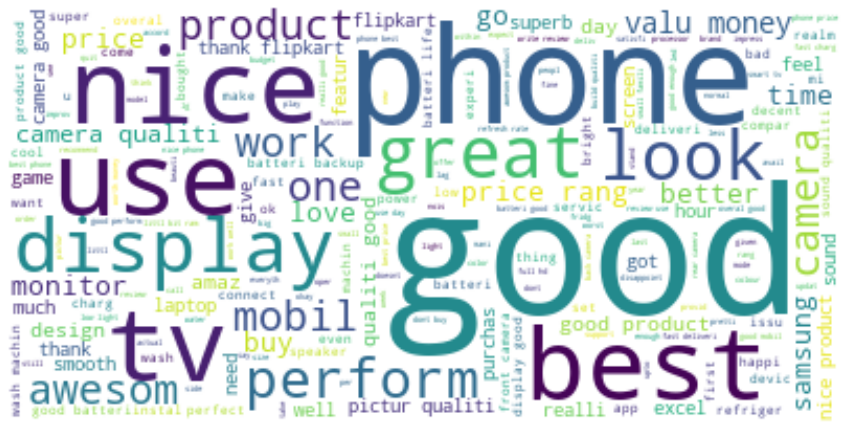

In [41]:
text=" ".join(i for i in data.Review)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [57]:
!pip install plotly 

In [59]:
nltk.download("vader_lexicon") 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Document\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
sentiment=SentimentIntensityAnalyzer()
data['positive']=[sentiment.polarity_scores(i)['pos']for i in data["Review"]]
data['Negative']=[sentiment.polarity_scores(i)['neg']for i in data["Review"]]
data['Neutral']=[sentiment.polarity_scores(i)['neu']for i in data["Review"]] 
data=data[["Review","positive","Negative","Neutral"]]
data.head() 

<ipython-input-63-62088f77c860>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-62088f77c860>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-62088f77c860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Review,positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


In [65]:
x=sum(data["positive"]) 
y=sum(data["Negative"])
z=sum(data["Neutral"])
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("positive")
    elif(b>a) and (b>c):
        print("Negative")
    elif (c>a) and (c>b):
        print("Neutral")
        sentiment_score(x,y,z) 

In [67]:
print("positive",x)
print("Negative",y)
print("Neutral",z)

positive 923.5529999999985
Negative 96.77500000000013
Neutral 1283.6880000000006
